### Quiz 3. tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 정답은 없습니다. 자유롭게 분석해보세요. 
- size는 식사 인원인것 같네요.
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)
- 지금까지 배운내용안에서 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.
- 적당한 그래프를 그려주시면 더 좋습니다.
- 반별로 제가 판단해서 가장 잘하신 과제는 다른 분들께 공유하며 제가 스타벅스 커피 삽니다.^^

In [1]:
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")  
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Pairplot 사용해보기
- 먼저 pairplot을 사용하기 위해 value값이 string인 것들을 int형으로 바꿔주는 작업을 합니다.

- tip을 low, middle, high 이름으로 범주형 데이터로 만들어 줍니다.

In [3]:
def tip_class(tip):
    if tip <= 3:
        return 'low_class'
    elif tip <= 6:
        return 'middle_class'
    else:
        return 'high_class'

def ch_sex(sex):
    if sex == "Male":
        return 1
    else:
        return 0
    
def ch_smoker(smoker):
    if smoker == "Yes":
        return 1
    else:
        return 0
    
def ch_time(time):
    if time == "Dinner":
        return 1
    else:
        return 0
    
def ch_day(day):
    if day == "Sun" or day == "Sat":
        return 1
    else:
        return 0

In [4]:
tips['ch_sex'] = tips['sex'].apply(ch_sex)
tips['ch_smoker'] = tips['smoker'].apply(ch_smoker)
tips['ch_time'] = tips['time'].apply(ch_time)
tips['ch_day'] = tips['day'].apply(ch_day)
tips['tip_class'] = tips['tip'].apply(tip_class)

In [5]:
#del tips['tip']

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,ch_sex,ch_smoker,ch_time,ch_day,tip_class
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1,1,low_class
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,1,1,low_class
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,1,1,middle_class
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,1,1,middle_class
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1,1,middle_class


#### tip에 해당되는 것만 보겠습니다.

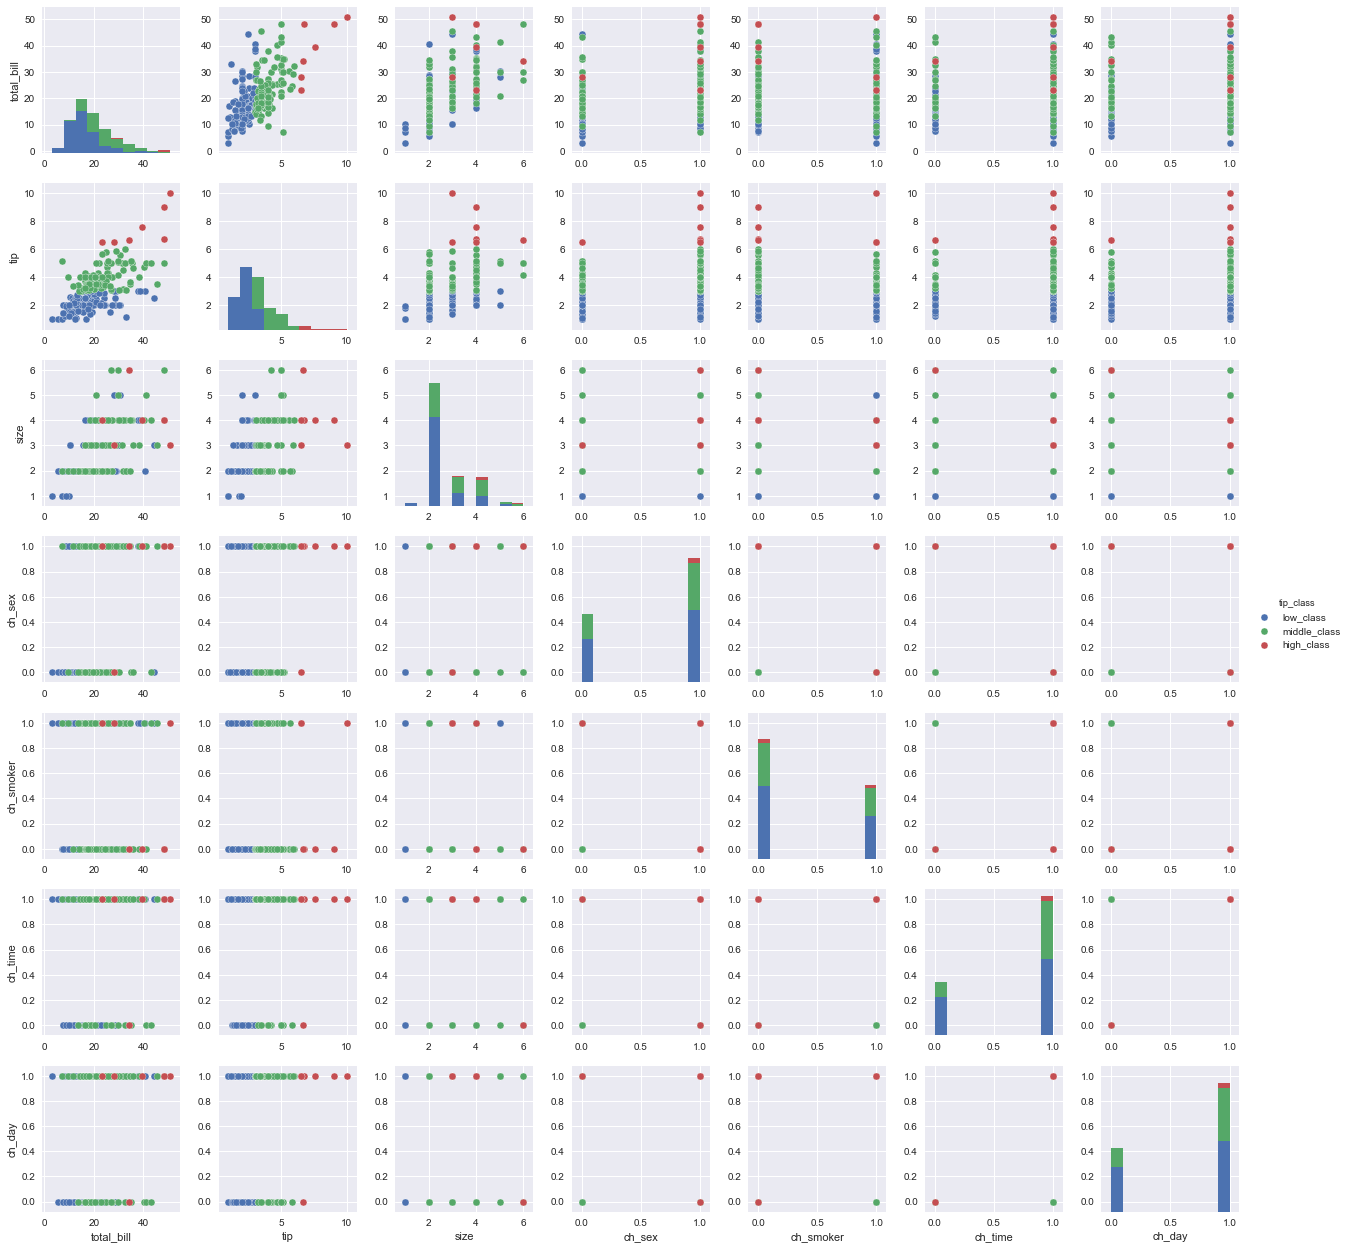

In [7]:
sns.pairplot(tips, hue = 'tip_class')

#### tip 과 다른 변수간의 관계를 대략적으로 살펴볼 수 있습니다. 
- tip vs `total_bill` : 양의 상관관계로 보이며 비싼 음식을 시킬수록 높은 tip을 받을 수 있을 것 같아 보인다.
- vs `size` : 대체적으로 2 ~ 4 명이서 온 손님들에게서 많은 팁과 높은 tip을 받을 수 있을 것 같아 보인다.
- vs `sex` : 성별은 남성일 경우 높은금액의 tip을 준 경우가 많습니다.
- vs `smoker` : 비흡연자의 손님이 더 많은 tip을 주는 것처럼 보이나 단정짓기 어렵습니다.
- vs `time` : 상대적으로 주말의 경우 많은 tip과 높은 금액의 tip을 주는 경향이 있습니다.
- vs `day` : 주말(토요일, 일요일)의 경우 더 많은 tip과 높은 금액의 tip을 주는 경향이 있습니다.

### 1. 흡연자와 비흡연자의 차이를 보기위해 heatmap을 사용해 파악해보기
- 비흡연자가 평균적으로 더 높은 금액의 tip을 주긴 하지만 큰 차이는 없어보입니다.
- 하지만 총 합을 계산해보면 많은 차이가 나는 것을 알 수 있습니다.

In [29]:
tips_mean = tips.pivot_table(index="smoker", columns="tip_class", values="tip", aggfunc=np.mean)
tips_mean

tip_class,high_class,low_class,middle_class
smoker,,,
Yes,7.666667,2.133704,3.933056
No,7.502500,2.136304,4.094909


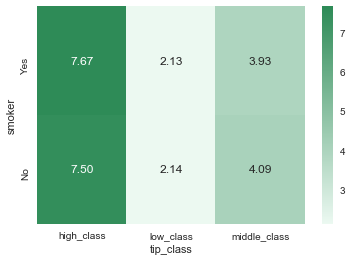

In [30]:
sns.heatmap(tips_mean, cmap = sns.light_palette("seagreen", as_cmap = True), annot = True, fmt = ".2f")

In [31]:
tips_sum = tips.pivot_table(index="smoker", columns="tip_class", values="tip", aggfunc=np.sum)
tips_sum

tip_class,high_class,low_class,middle_class
smoker,,,
Yes,23.00,115.22,141.59
No,30.01,196.54,225.22


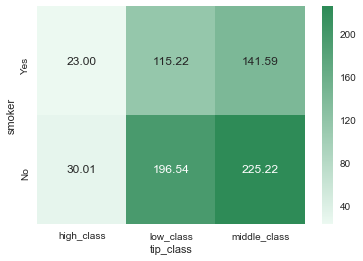

In [32]:

1
sns.heatmap(tips_sum, cmap = sns.light_palette("seagreen", as_cmap = True), annot = True, fmt = ".2f")

### 2. size가 적을수록 팁을 많이 주는지 확인해보기

- 확실히 size가 2~4이면 팁이 많다는 것을 확인

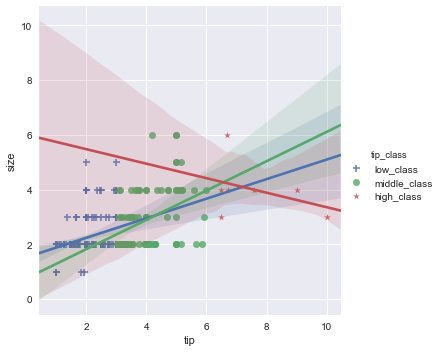

In [10]:
sns.lmplot(x = 'tip',y = 'size', hue = 'tip_class',data = tips, markers = ["+", "o", "*"])

### 3. 주말과 평일 비교해보기
- 주말이 더 많긴하지만
- 주말엔 점심에 손님이 없다는 것이 눈에 보인다

In [11]:
tips_mean = tips.pivot_table(index="time", columns="day", values="tip", aggfunc=np.mean)
tips_mean

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,2.767705,2.382857,NaN,NaN
Dinner,3.000000,2.940000,2.993103,3.255132


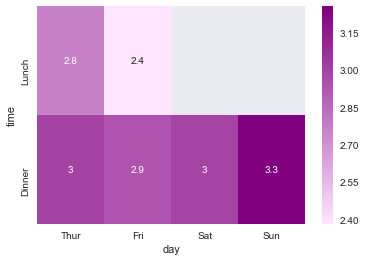

In [12]:
sns.heatmap(tips_mean, cmap = sns.light_palette("purple", as_cmap = True), annot = True, fmt = ".2g")

### 4. 가설설정 : total_bill이 높은 손님일수록 팁을 많이 줄 것이다.

- 분석과정설정 : x축을 팁, y축을 total_bill로 두고 경향을 비교해본다

In [13]:
df = pd.DataFrame(tips, columns=['total_bill', 'tip'])
df.tail()

,total_bill,tip
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75
243,18.78,3.00


In [14]:
len(df)

244

In [15]:
max(df['tip']), min(df['tip'])

(10.0, 1.0)

In [16]:
max(df['total_bill']), min(df['total_bill'])

(50.81, 3.07)

#### 4-1. jointplot 을 활용해 전체적인 경향을 보면 우상향 하는 것을 알 수 있고, 대부분의 팁은 2~4 에 많이 분포가 되어있으며 손님은 10~30 까지 분포가 되어있음을 알 수 있었습니다.

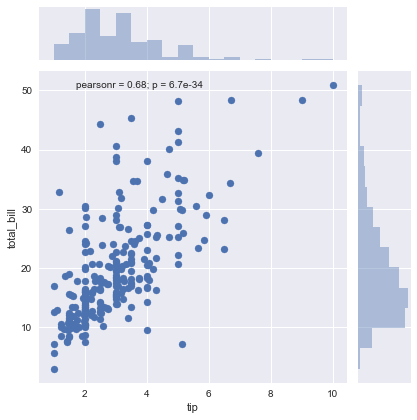

In [17]:
sns.set()
sns.jointplot(x = "tip", y = "total_bill", data = df)

#### 4-2. 전체적인 trend를 나타나내는 직선을 표현을 같이 표현해주고 싶었습니다.

In [18]:
# trend 변수에 tip과 total_bill 사이에 1차원의 직선을 구성하는 두 요소를 찾고

trend = np.polyfit(df['tip'], df['total_bill'], 1)
trend

array([ 4.34771421,  6.75028377])

In [19]:
# x 축역할을 할 변수를 만드는데 위에서 확인한 결과 가장 많이 받은 팁은 10 최소가 1이므로
# 1부터 10까지 244 개의 x축이 될 변수를 만들었습니다

fx = np.linspace(1, 10, 244)
fx

array([  1.        ,   1.03703704,   1.07407407,   1.11111111,
         1.14814815,   1.18518519,   1.22222222,   1.25925926,
         1.2962963 ,   1.33333333,   1.37037037,   1.40740741,
         1.44444444,   1.48148148,   1.51851852,   1.55555556,
         1.59259259,   1.62962963,   1.66666667,   1.7037037 ,
         1.74074074,   1.77777778,   1.81481481,   1.85185185,
         1.88888889,   1.92592593,   1.96296296,   2.        ,
         2.03703704,   2.07407407,   2.11111111,   2.14814815,
         2.18518519,   2.22222222,   2.25925926,   2.2962963 ,
         2.33333333,   2.37037037,   2.40740741,   2.44444444,
         2.48148148,   2.51851852,   2.55555556,   2.59259259,
         2.62962963,   2.66666667,   2.7037037 ,   2.74074074,
         2.77777778,   2.81481481,   2.85185185,   2.88888889,
         2.92592593,   2.96296296,   3.        ,   3.03703704,
         3.07407407,   3.11111111,   3.14814815,   3.18518519,
         3.22222222,   3.25925926,   3.2962963 ,   3.33

In [20]:
# f1 이라는 이름으로 trend 방금 직선을 구성한 두요소를 넣고 함수를 만들었습니다.
f1 = np.poly1d(trend)

In [21]:
# 이 것은 팁을 5 를 받았을 때 그 손님은 28.5의 총 음식비용을 지불했다는 것을 뜻합니다.
f1(5)

28.48885480800098

#### 4-3. 결과확인 : 위를 종합해 봤을 때 총 '비용'과 전체적인 '팁'들의 분포가 연관성이 높아 보이지만 팁을 2~ 6 사이에선 아쉬운 결과를 보여주고 있습니다.

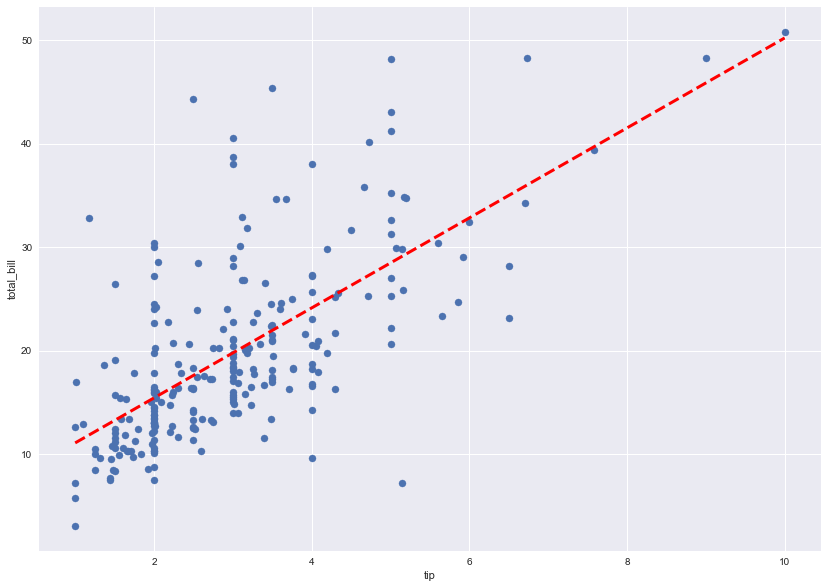

In [34]:
plt.figure(figsize=(14,10))
plt.scatter(df['tip'], df['total_bill'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'r')
plt.xlabel('tip')
plt.ylabel('total_bill')
plt.show()

### 5. 가설설정 : 저녁시간이 점심시간보다 더 많은 비용의 팁을 줄 것이다.

- 분석과정설정 : 점심시간과 팁, 저녁시간과 팁, 데이터프레임을 나누고 scatter그래프로 표현한뒤 합쳐서 그려보고 비교를 해본다

- 우선 팁이 발생한 이벤트 컬럼을 추가해줍니다. ( 추후 그래프에서 x축으로 사용 )

In [35]:
event = np.array([i for i in range(1,244+1)])

In [36]:
tips['event'] = event
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,ch_sex,ch_smoker,ch_time,ch_day,tip_class,event
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,1,middle_class,240
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,1,low_class,241
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,1,low_class,242
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,1,low_class,243
243,18.78,3.00,Female,No,Thur,Dinner,2,0,0,1,0,low_class,244


#### 5-1. 필요한 컬럼만 뽑아옵니다.

In [37]:
time_df = pd.DataFrame(tips,columns=['time','tip','event'])
time_df.tail()

,time,tip,event
239,Dinner,5.92,240
240,Dinner,2.00,241
241,Dinner,2.00,242
242,Dinner,1.75,243
243,Dinner,3.00,244


#### 5-2. value 값을 팁으로 하고 피봇을 생성해 줍니다

In [38]:
df1 = time_df.pivot("event","time","tip" )
df1.tail()

time,Lunch,Dinner
event,,
240,NaN,5.92
241,NaN,2.00
242,NaN,2.00
243,NaN,1.75
244,NaN,3.00


#### 5-3. 위 상태로는 scatter를 적용할 수 없으므로 인덱스를 초기화 해줘서 데이터 프레임 형태로 만듭니다

In [39]:
df1 = time_df.pivot("event","time","tip" ).reset_index(drop = True)
df1.tail()

time,Lunch,Dinner
239,NaN,5.92
240,NaN,2.00
241,NaN,2.00
242,NaN,1.75
243,NaN,3.00


#### 5-4. lunch_s 와 dinner_s  각각의 데이터프레임을 만들어줍니다. 

In [40]:
lunch_s = pd.DataFrame(df1, columns = ['Lunch']).reset_index()
lunch_s.tail()

time,index,Lunch
239,239,NaN
240,240,NaN
241,241,NaN
242,242,NaN
243,243,NaN


In [41]:
dinner_s = pd.DataFrame(df1, columns = ['Dinner']).reset_index()
dinner_s.tail()

time,index,Dinner
239,239,5.92
240,240,2.00
241,241,2.00
242,242,1.75
243,243,3.00


#### 5-5. 두 데이터프레임의  scatter를 찍어주면 비교를 할 수 있습니다.

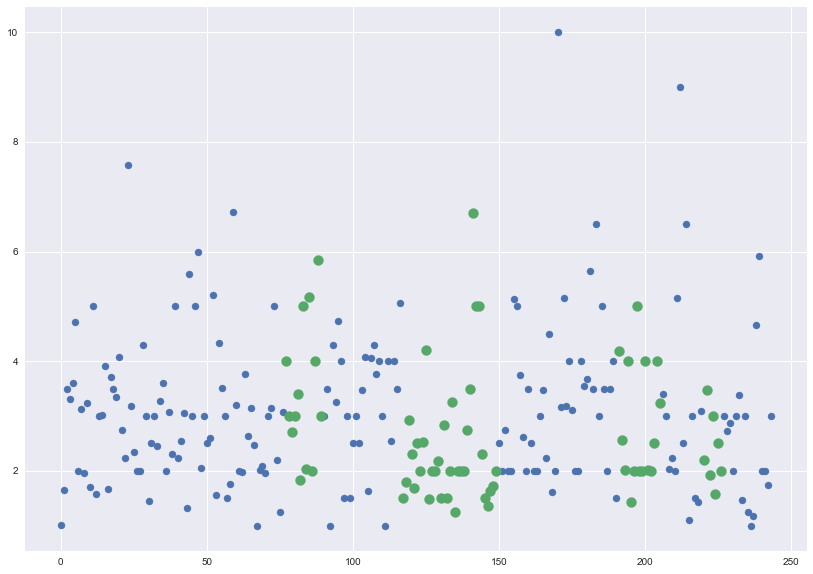

In [42]:
plt.figure(figsize=(14,10))
plt.scatter(dinner_s['index'], dinner_s['Dinner'], s = 50)
plt.scatter(lunch_s['index'],lunch_s['Lunch'], s = 100)
plt.show()

#### 5-6. 결과확인 : 저녁시간에 더 높은 금액의 팁을 받을 줄 알았지만, 차이가 없는 것으로 보입니다.

### 6. 가설설정 : 사이즈가 적고 total_bill이 높은 손님일수록 팁을 받는 횟수가 많을 것이다.

- 피봇테이블로 구성하여 heatmap으로 비교해본다.
- heatmap을 구성하기 위해 total_bill의 데이터를 범위로 나눈다 ( 컬럼으로 사용하기 위해 )
- 팁을 주는 횟수를 측정하기위해 Count 컬럼을 추가한다

In [43]:
def total_bill_size(total_bill):
    if total_bill < 5:
        return "1 ~ 4"
    elif total_bill < 10:
        return "5 ~ 9"
    elif total_bill < 15:
        return "10 ~ 14"
    elif total_bill < 20:
        return "15 ~ 19"
    elif total_bill < 25:
        return "20 ~ 24"
    elif total_bill < 30:
        return "25 ~ 29"
    elif total_bill < 35:
        return "30 ~ 34"
    elif total_bill < 40:
        return "35 ~ 39"
    elif total_bill < 45:
        return "40 ~ 44"
    else:
        return "45 ~"

In [44]:
tips["bill_range"] = tips['total_bill'].apply(total_bill_size)

In [45]:
tips["count"] = 1

In [46]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,ch_sex,ch_smoker,ch_time,ch_day,tip_class,event,bill_range,count
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,1,middle_class,240,25 ~ 29,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,1,low_class,241,25 ~ 29,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,1,low_class,242,20 ~ 24,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,1,low_class,243,15 ~ 19,1
243,18.78,3.00,Female,No,Thur,Dinner,2,0,0,1,0,low_class,244,15 ~ 19,1


In [47]:
df3 = tips.pivot_table(values = 'count', index = ['size'], columns=['bill_range'], aggfunc = np.sum)

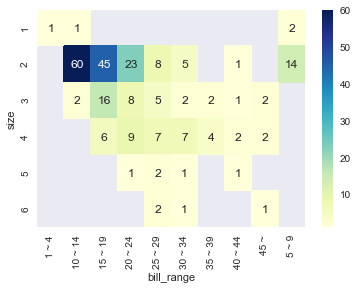

In [48]:
sns.heatmap(df3, cmap = "YlGnBu", annot = True, fmt = ".2g")

### 6-1. 그렇다면 평균 tip차이는 어떨까?

- value 값을 count가 아닌 tip으로 하고 np.mean을 한 피봇 테이블을 형성한 후 heatmap을 만들어보자

- 사이즈가 크고 total_bill이 클수록 평균적으로 높은 금액의 tip을 받는 것을 알 수 있다.

In [49]:
df3 = tips.pivot_table(values = 'tip', index = ['size'], columns=['bill_range'], aggfunc = np.mean)

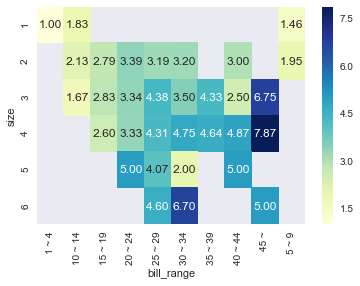

In [50]:
sns.heatmap(df3, cmap = "YlGnBu", annot = True, fmt = ".2f")

### 6-2. 총 발생한 tip 금액차이는 어떨까?

- value 값을 count가 아닌 tip으로 하고 np.sum을 한 피봇 테이블을 형성한 후 heatmap을 만들어보자

In [51]:
df3 = tips.pivot_table(values = 'tip', index = ['size'], columns=['bill_range'], aggfunc = np.sum)

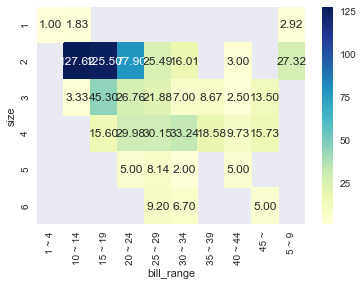

In [52]:
sns.heatmap(df3, cmap = "YlGnBu", annot = True, fmt = ".2f")